<center><font size = "10"> Week 4 - Cable Theory <center>
<center><font size = "8">Home work<center>

#### Group: Group 1

# Ex1: Voltage variation in space

<font size="3">Create a simple morphology with only one section called soma, as it is done in tutorial 01 of this week 4, point 1. Perform a curret clamp experiment in which the stimulation has the following parameters: delay 1 ms, amplitud 1 nA and duration 10 ms. Then do the following:
    
<font size="3">- instead of injecting current at the middle of the section, inject current simultaneously at the two endpoints
        
<font size="3">- without changing the morphology, increase the voltage attenuation from the center of the section to the ends. 
     

<font size="3">Plot the result for each of the previous points and explain what is happening in each situation. In this exercise is important to keep the previous values each time you change some parameter.
If not, you won’t be able to compare them.
    
[0.5 points]

In [1]:
# Importing Libraries

%matplotlib inline
from neuron import h
import matplotlib.pyplot as plt
import numpy as np
import math as m
import neurom as nm
from neurom import viewer
from hoc2swc import neuron2swc

In [21]:
# Global containers for objects
stimdictlst = [] # stimulations
vdictlst = []    # voltage recordings
idictlst = []    # current recordings

def reset():
    del stimdictlst[:]
    del vdictlst[:]
    del idictlst[:]

# Inject a current step with parameters at location
def iclamp(location, delay, amplitude, duration):
    stim = h.IClamp(location) # Place a stimulation electrode at location
    stim.delay = delay   # stim delay (ms)
    stim.amp = amplitude # stim amplitude (pA)
    stim.dur = duration  # stim duration (ms)
    stimdictlst.append({ 'stim': stim, 'loc': str(location) })
    return stim

# Setup recording of voltage at location
def vrecord(location):
    vec = h.Vector()
    vec.record(location._ref_v) # record voltage at location
    vdictlst.append({ 'vec': vec, 'loc': str(location) })
    return vec

# Setup recording of stimulation current
def irecord(stimdict):
    vec = h.Vector()
    vec.record(stimdict['stim']._ref_i) # record stimulation current
    idictlst.append({ 'vec': vec, 'loc': stimdict['loc'] })
    return vec

# Initialize and run a simulation
def initrun(v_i,t_stop):
    # Record time
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # Record current for all stimuli
    for stimdict in stimdictlst:
        irecord(stimdict)
    # Setup simulation and run
    h.load_file('stdrun.hoc')
    h.finitialize(v_i) # initial voltage
    h.continuerun(t_stop) # final time
    return rec_t

# Plot current and voltage for all stims and recordings
def tvi_plots(t, vdictlst, idictlst, vmax = 70, imax = 2):
    plt.figure()
    plt.title('currents')
#     plt.ylim((-0.01,5))
    plt.xlabel('t (ms)')
    plt.ylabel('I (nA)')
    for i, idict in enumerate(idictlst):
        plt.plot(t,idict['vec'],label=('Soma'+str(i)))
    plt.legend(loc=1)
    
    plt.figure()
    plt.title('voltages')
#     plt.ylim((-71,vmax))
    plt.ylabel('V (mV)')
    plt.xlabel('t (ms)')
    for vdict in vdictlst:
        print('hello')
        plt.plot(t,vdict['vec'],label='Soma(0.5)')
    plt.legend(loc=1)

In [22]:
# Create a section 
soma = h.Section()
soma.Ra = 0.0000001
soma.L = 100
soma.diam = 10
soma.cm = 1
soma.nseg = 11

In [23]:
# Inject a current step into the soma
reset()
delay = 1 #ms
amp = 1 #nA
dur = 10 #ms
stim_1 = iclamp(soma(0), delay, amp, dur)
stim_2 = iclamp(soma(1), delay, amp, dur)
vec_v = vrecord(soma(0.5))

hello


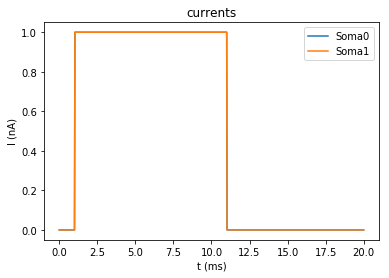

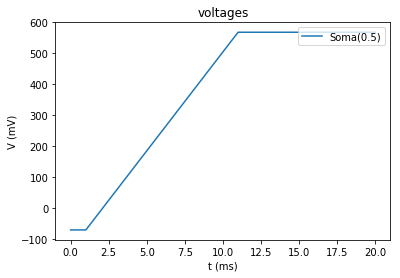

In [24]:
# Simulate and plot
v_init = -70
t_stop = 20
tvi_plots(initrun(v_init,t_stop),vdictlst,idictlst)

#### - What is happening in this first situation:
When plotting the recorded current and voltage in the middle of the soma (soma(0.5)) without any voltage attenuation, the steepness of linear voltage response is the combination of both injections.  Indeed, when we delay one of the injection compared to the other, we notice that the voltage ramps is divided into two steepness and there is coherent dissymmetry.

#### - Without changing the morphology, increase the voltage attenuation from the center of the section to the ends:

In [25]:
# Create a section 
soma = h.Section()
soma.Ra = 1
soma.L = 100
soma.diam = 10
soma.cm = 1
soma.nseg = 11

In [26]:
def transposeRecording(reclist, nloc, tstop):
    retlist = []  
    # each element of reclist is a neuron.h.Vector of recordings for one out of nloc spatial locations
    # (usually compartment centers) over time
    for i in range(0,int(tstop/h.dt)+1):
        retlist.append(h.Vector(nloc,0)) 
        for j in range(0,nloc):
            retlist[i].x[j] = reclist[j].x[i]
    return retlist

In [27]:
# Inject a current step into the soma
reset()
delay = 1 #ms
amp = 1 #nA
dur = 10 #ms

In [66]:
def plot_currents(ax, idictlst, t, legend=True):
    ax.set_title('Currents')
    ax.set_xlabel('t (ms)')
    ax.set_ylabel('I (nA)')
    for i, idict in enumerate(idictlst):
        ax.plot(t, idict['vec'],label=('Soma'+str(i)))
    if legend:
        ax.legend(loc=1)

def plot_voltages(ax, vdictlst, t, ra, legend=True):
    ax.set_title('Voltages')
    ax.set_ylabel('V (mV)')
    ax.set_xlabel('t (ms)')
    for vdict in vdictlst:
        ax.plot(t,vdict['vec'],label='Ra= '+str(int(ra))+' Ω*cm')
    if legend:
        lgd = ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

def plot_spatial_dist(ax, x_locations, spatialrec, t_selected, ra, legend=True):
    ax.plot(xlocations, spatialrec[t_selected], label='Ra= '+str(int(ra))+' Ω*cm') # 1.025/0.025 = 41
    ax.set_ylabel("Voltage (mV)")
    ax.set_xlabel("Spatial location (um)")
    ax.set_title("Spatial distribution at t = 1.025 ms")
    if legend:
        lgd = ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

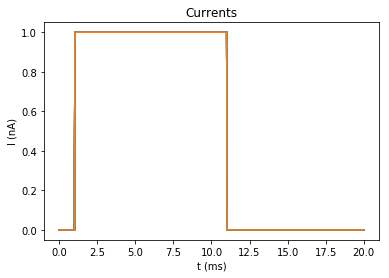

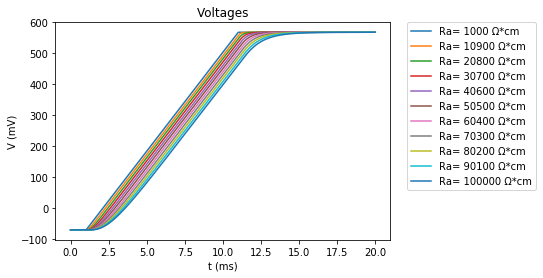

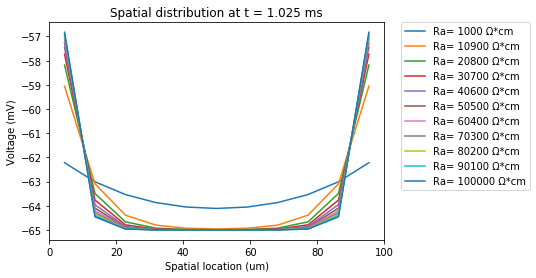

In [67]:
# Simulate and plot
v_init = -70
t_stop = 20
Ra_values = np.linspace(1000,100000,11)
fig_curr = plt.figure()
ax1 = fig_curr.add_subplot(1,1,1)
fig_volt = plt.figure()
ax2 = fig_volt.add_subplot(1,1,1)
fig_spatial_dist = plt.figure()
ax3 = fig_spatial_dist.add_subplot(1,1,1)

for ra in Ra_values:
    reset()
    soma.Ra = ra
    stim_1 = iclamp(soma(0.5/soma.nseg), delay, amp, dur)
    stim_2 = iclamp(soma(10.5/soma.nseg), delay, amp, dur)
    vec_v = vrecord(soma(5.5/soma.nseg))
    
    reclist = h.List()
    for i in range(0, soma.nseg):
        tmpRecVec = h.Vector()
        tmpRecVec.record(soma((0.5 + i*1.0)/soma.nseg)._ref_v)
        reclist.append(tmpRecVec)

    h.init()
    h.run(11)
    xlocations = h.Vector()

    for i in range(0,soma.nseg):
        xlocations.append(soma.L*(0.5 + i*1.0)/(soma.nseg))

    spatialrec = transposeRecording(reclist, soma.nseg, 5)
    
    # Simulate and plot
    plot_currents(ax1, idictlst, initrun(v_init,t_stop), legend=False)
    plot_voltages(ax2, vdictlst, initrun(v_init,t_stop), ra)
    plot_spatial_dist(ax3, xlocations, spatialrec, 41, ra)

#### - What is happening in second situation:

When increasing the axial resisitivity, the length constant from the cable equation is reduced.  As a result, in order to increase the voltage attenuation, one therefore needs to increase the axial resisitivity.  Indeed, from the plots above, when increasing the voltage attenuation, one can see ...
# !!!!! ADD CONCLUSION AND WHAT WE CAN SEE !!!! (and for exo 2 check out if closest to soma is axon(0) or axon(1))

# Ex 2. Action Potential Propagation. 

<font size='3'>Create a neuron with a soma, an axon with three segments, and a dendrite with three branches, each of the branches with different diameters but with the same length. Add passive properties to every section and add active properties (hh) to the soma, axon and the dendrite, but not to the branches. You can use the parameters from tutorial 02. Perform a current clamp experiment in which the axon is stimulated at the end closest to the soma and the branches are recorded at the far end. Choose the best stimulation parameters to see the signal attenuation in the branches.
    
<font size='3'>Explain with your own words:
    
<font size='3'>- What are passive and active membrane properties?
    
<font size='3'>- What is going on with the signal propagation from the soma to the branches?
    
<font size='3'>- What happen if the active properties of the dendrite are removed?
    
<font size='3'>- Record the potential at the end of the axon. What happens if the active properties of the middle axonal section are removed? What could this represent biologically?
    
[1.5 points]

In [67]:
%matplotlib inline

from neuron import h
import matplotlib.pyplot as plt
import numpy as np
import math as m
import neurom as nm
from neurom import viewer
from hoc2swc import neuron2swc

In [184]:
# Functions needed to run simulation and record (put here again, supposing that we have restarted the kernel in between exo 1 and exo 2)

# Global containers for objects
stimdictlst = [] # stimulations
vdictlst = []    # voltage recordings
idictlst = []    # current recordings

# Convenience functions for setting up stimulation, recording and simulation

def reset():
    del stimdictlst[:]
    del vdictlst[:]
    del idictlst[:]

# Inject a current step with parameters at location
def iclamp(location, delay = 100, amplitude = 0.1, duration = 500):
    stim = h.IClamp(location) # Place a stimulation electrode at location
    stim.delay = delay   # stim delay (ms)
    stim.amp = amplitude # stim amplitude (pA)
    stim.dur = duration  # stim duration (ms)
    stimdictlst.append({ 'stim': stim, 'loc': str(location) })

# Initialize and run a simulation
def initrun(v_i,t_stop):
    # Record time
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # Record current for all stimuli
    for stimdict in stimdictlst:
        irecord(stimdict)
    # Setup simulation and run
    h.load_file('stdrun.hoc')
    h.finitialize(v_i) # initial voltage
    h.continuerun(t_stop) # final time
    return rec_t

# Plot current and voltage for all stims and recordings
def tvi_plots(t, vdictlst = [], idictlst = [], vmax = 40, imax = 0.5):
    plt.figure()
    plt.title('currents')
    #plt.ylim((-0.01,imax))
    plt.xlabel('t (ms)')
    plt.ylabel('I (pA)')
    for idict in idictlst:
        plt.plot(t,idict['vec'],label=idict['loc'])
    plt.legend(loc=1)
    
    plt.figure()
    plt.title('voltages')
    #plt.ylim((-71,vmax))
    plt.ylabel('V (mV)')
    plt.xlabel('t (ms)')
    for vdict in vdictlst:
        plt.plot(t,vdict['vec'],label=vdict['loc'])
    plt.legend(loc=1)

# Setup recording of voltage at location
def vrecord(location):
    vec = h.Vector()
    vec.record(location._ref_v) # record voltage at location
    vdictlst.append({ 'vec': vec, 'loc': str(location) })

# Setup recording of stimulation current
def irecord(stimdict):
    vec = h.Vector()
    vec.record(stimdict['stim']._ref_i) # record stimulation current
    idictlst.append({ 'vec': vec, 'loc': stimdict['loc'] })
    
# Plot morphology
def plot_morpho(fname = 'cell_01'):
    fname = '{}.swc'.format(fname)
    h.define_shape()
    h.topology()
    neuron2swc(fname, swap_yz=False)
    neuron1 = nm.load_neuron(fname)
    viewer.draw(neuron1)

In [95]:
# Creating Neuron Sections
soma, dend, db1, db2, db3, axon = [h.Section(name=n) for n in ['soma', 'dend', 'dend_branch1', 'dend_branch2', 'dend_branch3', 'axon']]

# SOMA SECTION
soma.L = 20       # length (µm)
soma.diam = 20    # diameter (µm)
soma.Ra = 123.0   # axial resistivity (Ω*cm)
soma.cm = 1       # capacitance (µF/cm^2) 

# AXON SECTION
axon.diam = 3
axon.L = 100      # length (µm)
axon.nseg = 3     # diameter (µm)
axon.Ra = 123.0   # axial resistivity (Ω*cm)
axon.cm = 1       # capacitance (µF/cm^2) 


# DENDRITE SECTION
dend.L = 200       # length (µm)
dend.diam = 1     # diameter (µm)
dend.nseg = 5     # number of segments
dend.Ra = 123.0   # axial resistivity (Ω*cm)
dend.cm = 1       # capacitance (µF/cm^2) 

# DENDRITE BRANCHES SECTIONS
# Long and thick
db1.L = 100
db1.diam = 3
db2.L = 100
db2.diam = 0.1
db3.L = 100
db3.diam = 0.01

# TOPOLOGY
axon.connect(soma(0))
dend.connect(soma(1))
db1.connect(dend(1))
db2.connect(dend(1))
db3.connect(dend(1))

# INSERT PASSIVE PROPERTIES
soma.insert('pas')
for seg in soma:
    seg.pas.g = 0.0003 # Conductance of the leak channels (in S/cm2)
    seg.pas.e = -70    # Leak reversal potential, it influences the steady state membrane potential

axon.insert('pas')
for seg in axon:
    seg.pas.g = 0.0003 # Conductance of the leak channels (in S/cm2)
    seg.pas.e = -70    # Leak reversal potential, it influences the steady state membrane potential
    
dend.insert('pas')
for seg in dend:
    seg.pas.g = 0.0003 # Conductance of the leak channels (in S/cm2)
    seg.pas.e = -70    # Leak reversal potential, it influences the steady state membrane potential

branchlst = [db1, db2, db3]

for branch in branchlst:
    branch.Ra = 130.0   # axial resistivity (Ω*cm)
    branch.cm = 1       # capacitance (µF/cm^2) 
    branch.insert('pas')
    for seg in branch:
        seg.pas.g = 0.0003 # Conductance of the leak channels (in S/cm2)
        seg.pas.e = -70    # Leak reversal potential, it influences the steady state membrane potential
    
# INSERT ACTIVE PROPERTIES
soma.insert('hh')
for seg in soma:
    seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
    seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels
    
axon.insert('hh')
for seg in axon:
    seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
    seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

dend.insert('hh')
for seg in dend:
    seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
    seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

In [96]:
# VISUALIZING TOPOLOGY
h.topology()


|-|       dend1(0-1)
|-|       soma(0-1)
   `----|       dend(0-1)
         `|       dend_branch1(0-1)
         `|       dend_branch2(0-1)
         `|       dend_branch3(0-1)
 `--|       axon(0-1)



1.0

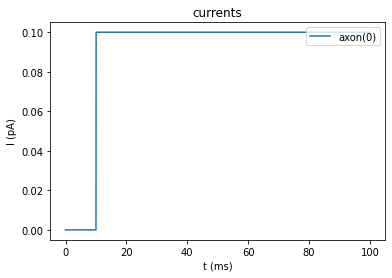

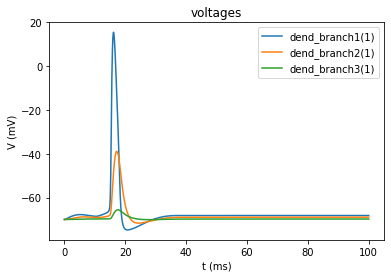

In [97]:
# Parameters testing:

time_delay = 10
amp = 0.1
dur = 500

##### Perform a current clamp experiment in which the axon is stimulated at the end closest to the soma
### and the branches are recorded at the far end

reset()

## Setup stimulations and recordings

# Axon stimulated at the end closest to the soma
iclamp(axon(0), delay = time_delay, amplitude = amp, duration = dur) # CHEEECKKK if closest to the soma is 0 or 1

# Record at the branches at the far end
vrecord(db1(1))
vrecord(db2(1))
vrecord(db3(1))

# Simulate and plot
v_init = -70
t_stop = 100

tvi_plots(initrun(v_init,t_stop),vdictlst,idictlst)

#### - What are passive and active membrane properties?

The active membrane properties can be associated with the voltage-gated or ligand-gated ion channels.  These gated ion channels contribute to generating action potential and electrical signalling across neurons.  These active membrane properties sit on top of the passive properties linked to the cable properties of the membrane.  Indeed, the passive membrane properties don't have any gating system: the flow of ions depend mainly on the difference between intracellular and extracellular difference.  These leaky currents are also mediated by membrane protein, but they are not gated.

#### - What is going on with the signal propagation from the soma to the branches?

When the signal is emitted from the soma and propagates to the branches, the leaky properties of the membrane will induce a reduction of voltage.  Indeed, when looking at the cable equations that are used to model the membrane properties of neurons, a length constant is defined to characterize this voltage attenuation.  When the length constant is shorter, the signal is attenuated more strongly as it propagates and its amplitude is more and more reduced.  This length constant is defined as the square root of the ratio between the membrane resistance and the axial resistance.
$$ \lambda = \sqrt{\frac{r_{membrane}}{r_{axial}}} $$

Moreover, the smaller a surface is (ie the smaller the diameter is), the harder it is for ions to flow through and therefore the higher the axial resistance is.
For this reason, when decreasing the diameter of the branches, the axon resistance considerably increases and leads to a decrease of the length constant.  Therefore, the voltage amplitude is strongly attenuated in branches with smaller diameter, as observed in the plot above.

#### - What happen if the active properties of the dendrite are removed?

The same experiment is repeated, but the active properties of the dendrites are removed:

In [98]:
# Creating Neuron Sections
soma, dend, db1, db2, db3, axon = [h.Section(name=n) for n in ['soma', 'dend', 'dend_branch1', 'dend_branch2', 'dend_branch3', 'axon']]

# SOMA SECTION
soma.L = 20       # length (µm)
soma.diam = 20    # diameter (µm)
soma.Ra = 123.0   # axial resistivity (Ω*cm)
soma.cm = 1       # capacitance (µF/cm^2) 

# AXON SECTION
axon.diam = 3
axon.L = 100      # length (µm)
axon.nseg = 3     # diameter (µm)
axon.Ra = 123.0   # axial resistivity (Ω*cm)
axon.cm = 1       # capacitance (µF/cm^2) 


# DENDRITE SECTION
dend.L = 200       # length (µm)
dend.diam = 1     # diameter (µm)
dend.nseg = 5     # number of segments
dend.Ra = 123.0   # axial resistivity (Ω*cm)
dend.cm = 1       # capacitance (µF/cm^2) 

# DENDRITE BRANCHES SECTIONS
# Long and thick
db1.L = 100
db1.diam = 3
db2.L = 100
db2.diam = 0.1
db3.L = 100
db3.diam = 0.01

# TOPOLOGY
axon.connect(soma(0))
dend.connect(soma(1))
db1.connect(dend(1))
db2.connect(dend(1))
db3.connect(dend(1))

# INSERT PASSIVE PROPERTIES
soma.insert('pas')
for seg in soma:
    seg.pas.g = 0.0003 # Conductance of the leak channels (in S/cm2)
    seg.pas.e = -70    # Leak reversal potential, it influences the steady state membrane potential

axon.insert('pas')
for seg in axon:
    seg.pas.g = 0.0003 # Conductance of the leak channels (in S/cm2)
    seg.pas.e = -70    # Leak reversal potential, it influences the steady state membrane potential
    
dend.insert('pas')
for seg in dend:
    seg.pas.g = 0.0003 # Conductance of the leak channels (in S/cm2)
    seg.pas.e = -70    # Leak reversal potential, it influences the steady state membrane potential

branchlst = [db1, db2, db3]

for branch in branchlst:
    branch.Ra = 130.0   # axial resistivity (Ω*cm)
    branch.cm = 1       # capacitance (µF/cm^2) 
    branch.insert('pas')
    for seg in branch:
        seg.pas.g = 0.0003 # Conductance of the leak channels (in S/cm2)
        seg.pas.e = -70    # Leak reversal potential, it influences the steady state membrane potential
    
# INSERT ACTIVE PROPERTIES IN AXON AND SOMA BUT NOT IN DENDRITE
soma.insert('hh')
for seg in soma:
    seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
    seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels
    
axon.insert('hh')
for seg in axon:
    seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
    seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

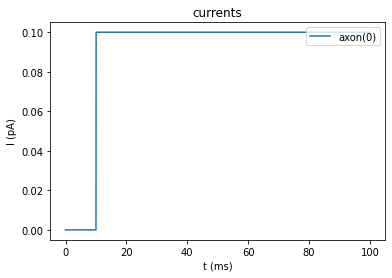

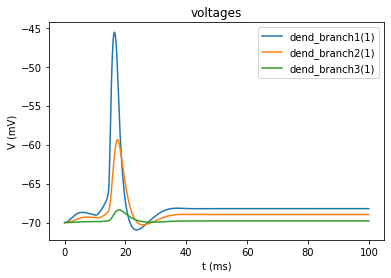

In [99]:
# Parameters testing:

time_delay = 10
amp = 0.1
dur = 500

##### Perform a current clamp experiment in which the axon is stimulated at the end closest to the soma
### and the branches are recorded at the far end

reset()

## Setup stimulations and recordings

# Axon stimulated at the end closest to the soma
iclamp(axon(0), delay = time_delay, amplitude = amp, duration = dur) # CHEEECKKK if closest to the soma is 0 or 1

# Record at the branches at the far end
vrecord(db1(1))
vrecord(db2(1))
vrecord(db3(1))

# Simulate and plot
v_init = -70
t_stop = 100

tvi_plots(initrun(v_init,t_stop),vdictlst,idictlst)

#### - What happen if the active properties of the dendrite are removed?

The same experience is realized and the active properties of the dendrites are removed. For the same exact conditions, we quickly realize that the voltage amplitude of the spikes is considerably reduced when the active properties of the dendrites are removed.
Indeed, the active properties of the dendrites allowed to activate the ion channels and help contribute to the propagation of the signal.  Whereas when they are turned off, the voltage is considerably reduced.  Moreover, one can note that the length constant reasoning in the previous section is (logically) conserved.  Indeed, the branch with the largest section and thus the lowest axial resisitivity has the biggest peak.

#### - Record the potential at the end of the axon. What happens if the active properties of the middle axonal section are removed? What could this represent biologically?

In [129]:
# RECORDING POTENTIAL AT THE END OF AXON WHEN ALL SEGMENTS OF AXON HAVE ACTIVE PROPERTIES
# Creating Neuron Sections
soma, dend, db1, db2, db3, axon = [h.Section(name=n) for n in ['soma', 'dend', 'dend_branch1', 'dend_branch2', 'dend_branch3', 'axon']]

# SOMA SECTION
soma.L = 20       # length (µm)
soma.diam = 20    # diameter (µm)
soma.Ra = 123.0   # axial resistivity (Ω*cm)
soma.cm = 1       # capacitance (µF/cm^2) 

# AXON SECTION
axon.diam = 3
axon.L = 100      # length (µm)
axon.nseg = 3     # diameter (µm)
axon.Ra = 123.0   # axial resistivity (Ω*cm)
axon.cm = 1       # capacitance (µF/cm^2) 


# DENDRITE SECTION
dend.L = 200       # length (µm)
dend.diam = 1     # diameter (µm)
dend.nseg = 5     # number of segments
dend.Ra = 123.0   # axial resistivity (Ω*cm)
dend.cm = 1       # capacitance (µF/cm^2) 

# DENDRITE BRANCHES SECTIONS
# Long and thick
db1.L = 100
db1.diam = 3
db2.L = 100
db2.diam = 0.1
db3.L = 100
db3.diam = 0.01

# TOPOLOGY
axon.connect(soma(0))
dend.connect(soma(1))
db1.connect(dend(1))
db2.connect(dend(1))
db3.connect(dend(1))

# INSERT PASSIVE PROPERTIES
soma.insert('pas')
for seg in soma:
    seg.pas.g = 0.0003 # Conductance of the leak channels (in S/cm2)
    seg.pas.e = -70    # Leak reversal potential, it influences the steady state membrane potential

axon.insert('pas')
for seg in axon:
    seg.pas.g = 0.0003 # Conductance of the leak channels (in S/cm2)
    seg.pas.e = -70    # Leak reversal potential, it influences the steady state membrane potential
    
dend.insert('pas')
for seg in dend:
    seg.pas.g = 0.0003 # Conductance of the leak channels (in S/cm2)
    seg.pas.e = -70    # Leak reversal potential, it influences the steady state membrane potential

branchlst = [db1, db2, db3]

for branch in branchlst:
    branch.Ra = 130.0   # axial resistivity (Ω*cm)
    branch.cm = 1       # capacitance (µF/cm^2) 
    branch.insert('pas')
    for seg in branch:
        seg.pas.g = 0.0003 # Conductance of the leak channels (in S/cm2)
        seg.pas.e = -70    # Leak reversal potential, it influences the steady state membrane potential
    
# INSERT ACTIVE PROPERTIES
soma.insert('hh')
for seg in soma:
    seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
    seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels
    
axon.insert('hh')
for seg in axon:
    seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
    seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

dend.insert('hh')
for seg in dend:
    seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
    seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

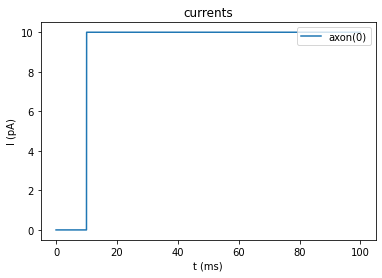

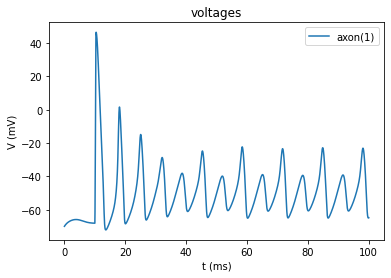

In [130]:
# Parameters testing:

time_delay = 10
amp = 10
dur = 500

##### Perform a current clamp experiment in which the axon is stimulated at the end closest to the soma
### and the branches are recorded at the far end

reset()

## Setup stimulations and recordings

# Axon stimulated at the end closest to the soma
iclamp(axon(0), delay = time_delay, amplitude = amp, duration = dur) # CHEEECKKK if closest to the soma is 0 or 1

# Record at the middle segment of the axon
vrecord(axon(1))

# Simulate and plot
v_init = -70
t_stop = 100

tvi_plots(initrun(v_init,t_stop),vdictlst,idictlst)

In [131]:
# RECORDING POTENTIAL AT THE END OF AXON WHEN MIDDLE SEGMENT OF AXON HAS NO ACTIVE PROPERTIES

# Creating Neuron Sections
soma, dend, db1, db2, db3, axon = [h.Section(name=n) for n in ['soma', 'dend', 'dend_branch1', 'dend_branch2', 'dend_branch3', 'axon']]

# SOMA SECTION
soma.L = 20       # length (µm)
soma.diam = 20    # diameter (µm)
soma.Ra = 123.0   # axial resistivity (Ω*cm)
soma.cm = 1       # capacitance (µF/cm^2) 

# AXON SECTION
axon.diam = 3
axon.L = 100      # length (µm)
axon.nseg = 3     # diameter (µm)
axon.Ra = 123.0   # axial resistivity (Ω*cm)
axon.cm = 1       # capacitance (µF/cm^2) 


# DENDRITE SECTION
dend.L = 200       # length (µm)
dend.diam = 1     # diameter (µm)
dend.nseg = 5     # number of segments
dend.Ra = 123.0   # axial resistivity (Ω*cm)
dend.cm = 1       # capacitance (µF/cm^2) 

# DENDRITE BRANCHES SECTIONS
# Long and thick
db1.L = 100
db1.diam = 3
db2.L = 100
db2.diam = 0.1
db3.L = 100
db3.diam = 0.01

# TOPOLOGY
axon.connect(soma(0))
dend.connect(soma(1))
db1.connect(dend(1))
db2.connect(dend(1))
db3.connect(dend(1))

# INSERT PASSIVE PROPERTIES
soma.insert('pas')
for seg in soma:
    seg.pas.g = 0.0003 # Conductance of the leak channels (in S/cm2)
    seg.pas.e = -70    # Leak reversal potential, it influences the steady state membrane potential

axon.insert('pas')
for seg in axon:
    seg.pas.g = 0.0003 # Conductance of the leak channels (in S/cm2)
    seg.pas.e = -70    # Leak reversal potential, it influences the steady state membrane potential
    
dend.insert('pas')
for seg in dend:
    seg.pas.g = 0.0003 # Conductance of the leak channels (in S/cm2)
    seg.pas.e = -70    # Leak reversal potential, it influences the steady state membrane potential

branchlst = [db1, db2, db3]

for branch in branchlst:
    branch.Ra = 130.0   # axial resistivity (Ω*cm)
    branch.cm = 1       # capacitance (µF/cm^2) 
    branch.insert('pas')
    for seg in branch:
        seg.pas.g = 0.0003 # Conductance of the leak channels (in S/cm2)
        seg.pas.e = -70    # Leak reversal potential, it influences the steady state membrane potential
    
# INSERT ACTIVE PROPERTIES
soma.insert('hh')
for seg in soma:
    seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
    seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

# NOT ADDING ACTIVE PROPERTIES OF THE MIDDLE SEGMENT
axon.insert('hh')
i = 1
for seg in axon:
    if i != 2: # If we are not on the second segment out of three, meaning the middle one
        seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
        seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels
    if i == 2:
        seg.hh.gkbar = 0
        seg.hh.gnabar = 0
    i = i+1

dend.insert('hh')
for seg in dend:
    seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
    seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

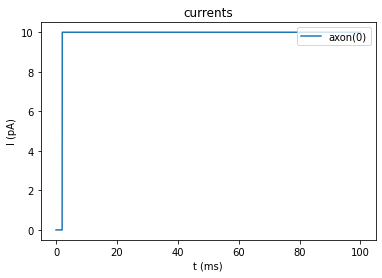

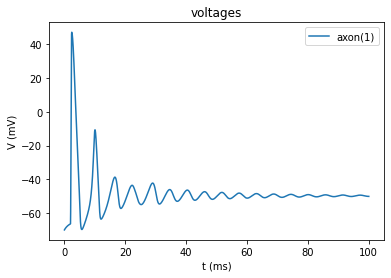

In [132]:
# Parameters testing:

time_delay = 2
amp = 10
dur = 500

##### Perform a current clamp experiment in which the axon is stimulated at the end closest to the soma
### and the branches are recorded at the far end

reset()

## Setup stimulations and recordings

# Axon stimulated at the end closest to the soma
iclamp(axon(0), delay = time_delay, amplitude = amp, duration = dur) # CHEEECKKK if closest to the soma is 0 or 1

# Record at the middle segment of the axon
vrecord(axon(1))

# Simulate and plot
v_init = -70
t_stop = 100

tvi_plots(initrun(v_init,t_stop),vdictlst,idictlst)

#### - What happens if the active properties of the middle axonal section are removed? What could this represent biologically?

When the active properties of the middle axonal section are removed, then the signal propagation is considerably reduced.  Indeed, the signal propagates much less efficiently as the leaky currents contribute to reducing the length constant.  This could represent the biological phenomenon of axonal myelination and the presence of Nodes of Ranvier.  Indeed, myelination wrapping helps increase the axonal resistance and thus very little leak occurs across myelinated axons, and the Nodes of Ranvier have a higher presence of sodium channels which decrease its action potential firing threshold and contributes to facilitating the propagation of the signals (saltatory conduction).

As seen in the plot above: when injecting a high current in both segments, the one without active properties shows a considerably rapid attenuation.

# Ex 3. Dendritic input signal sumation in the soma

<font size="3">Load the morphology file for your group, and instanciate it as it is done on tutorial 03. Perform a current clamp experiment that stimulates all the dendrites (basal and apical) in the middle. Play arround with the different stimulation parameters: delay, amplitude and duration.

<font size="3">Plot some results that would help you to explain: what is dendritic signal integration? and in your opinion, what is the importance of this in biology?
    
<font size="3">What happens when you stimulate only the basal or only the apical dendrites? Why is this?
    
[3 points]

In [57]:
# Loading file from our Group 1:
%matplotlib inline
from neuron import h
import matplotlib.pyplot as plt
import numpy as np
import math as m
import neurom as nm
from neurom import viewer
from hoc2swc import neuron2swc

In [58]:
class NEURON:
    def __init__(self):
        self.build_morphology()
        self.define_biophysics()
        
    def build_morphology(self):
        """
        Loads a 3D morphology of the neuron
        """
        # Load hoc routines to import 3D morphologies
        h.load_file('stdlib.hoc')
        h.load_file("import3d.hoc")
        #cell = h.Import3d_SWC_read() # If we have a .swc morphology file
        cell = h.Import3d_Neurolucida3() # If we have an .asc morphology file

        # Read the file and creates automatically section.connect(parent) statements
        cell.input('Group1_morphology.asc')

        # Instantiate morphology for simulation and
        # execute the connect statements and loads the cell into h scope
        self.importedcell = h.Import3d_GUI(cell,0)
        self.importedcell.instantiate(None) 

        # Create python lists from the morphology with the different sections: soma, dend, apic and axon
        self.somatic = []
        self.dendritic = []
        self.apical = []
        self.axonal = []
        self.all = []
        for sec in h.allsec():
            if 'soma' in sec.name():
                self.somatic.append(sec)
            if 'dend' in sec.name():
                self.dendritic.append(sec)
            if 'apic' in sec.name():
                self.apical.append(sec)
            if 'axon' in sec.name():
                self.axonal.append(sec)
    
    def define_biophysics(self):
        """
        Distributes passive mechanisms and hh active prop on the soma and dendrites
        """   
        # Define passive properties for all sections
        for sec in h.allsec():
            sec.insert('pas')
            sec.nseg = 1
            for seg in sec:
                seg.pas.g = 0.0003 # Conductance of the leak channels (in S/cm2)
                seg.pas.e = -70
        
        # Define active properties for soma, dendrite, apical dendrite and axon
        for sec in self.somatic:
            # insert hh
            sec.insert('hh')
            sec.Ra = 1
            sec.nseg = 1
            for seg in sec:
                seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
                seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels
        
        for sec in self.dendritic:
            # insert hh
            sec.insert('hh')
            sec.Ra = 300
            sec.nseg = 1
            for seg in sec:
                seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
                seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels
        
        for sec in self.apical:
            # insert hh
            sec.insert('hh')
            sec.Ra = 400
            sec.nseg = 1
            for seg in sec:
                seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
                seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels
        
        for sec in self.axonal:
            # insert hh
            sec.insert('hh')
            sec.Ra = 100
            sec.nseg = 1
            for seg in sec:
                seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
                seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

In [59]:
Cell = NEURON()


19847 lines read


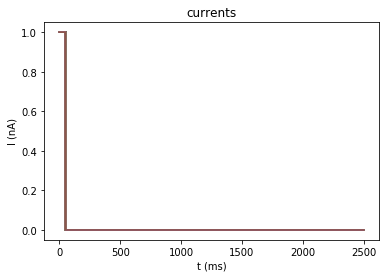

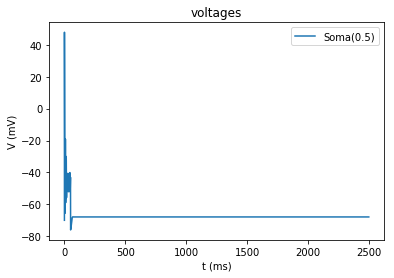

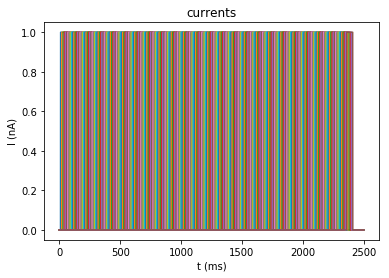

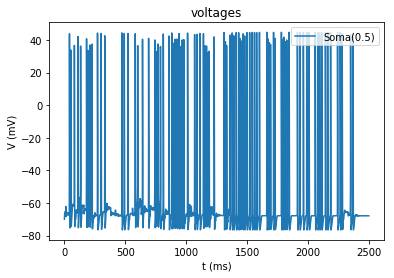

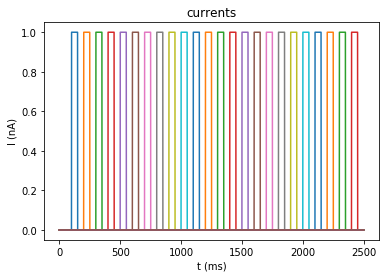

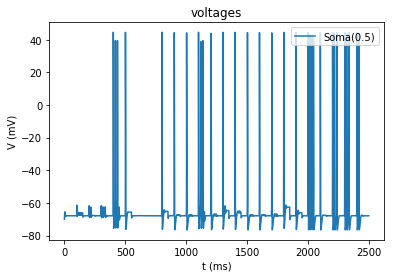

In [65]:
# Perform a current clamp that stimulates all the dendrites (basal and apical) in the middle
# Play around with different parameters: delay, amplitude and duration
delay_time_values = [0, 10, 100]
amp = 1
dur = 50
v_init = -70
t_stop = 2500

for delay_time in delay_time_values:
    reset()
    dendrite_list = Cell.dendritic + Cell.apical

    # Setup stimulations and recordings
    for idx,dendrites in enumerate(dendrite_list):
        iclamp(dendrites(0.5), amplitude = amp, delay = delay_time +idx*delay_time , duration = dur)
    vrecord(Cell.somatic[0](0.5))

    # Simulate and plot
    tvi_plots(initrun(v_init,t_stop),vdictlst,idictlst,vmax = -65)

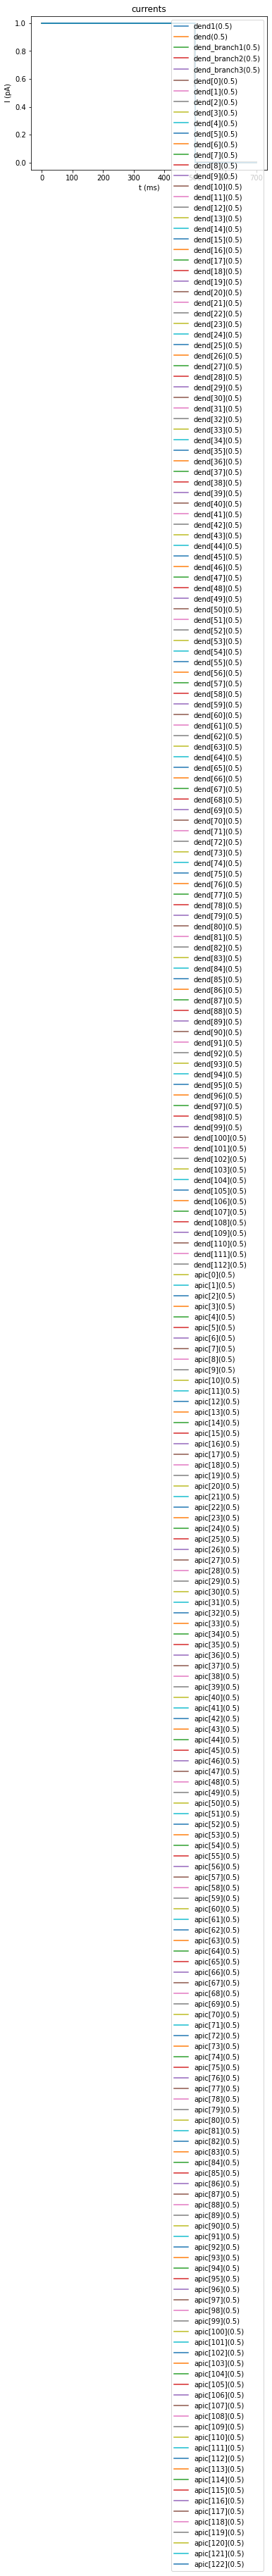

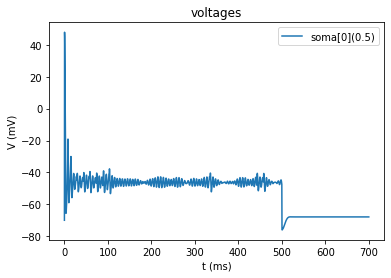

In [190]:
# Plot some results that would help to explain: What is dendritic signal integration? And what is the importance of this in biology?

delay_time = 0
amp = 1
dur = 500

reset()

dendrite_list = Cell.dendritic + Cell.apical

# Setup stimulations and recordings
for idx,dendrites in enumerate(dendrite_list):
    iclamp(dendrites(0.5), amplitude = amp, delay = delay_time + 0, duration = dur)
vrecord(Cell.somatic[0](0.5))

# Simulate and plot
v_init = -70
t_stop = 700
tvi_plots(initrun(v_init,t_stop),vdictlst,idictlst,vmax = -65)

# Plot some results that would help to explain: What is dendritic signal integration? And what is the importance of this in biology?

If one considerably reduces the delay between the incoming dendritic signals and they all arrive at the same time, then this leads to a considerably higher voltage recording at the level of the soma.  Indeed, there seems to be a summative effect of all dendritic signals arriving simultaneously, compared to if they were to arrive at delayed levels.

- To check out in order to have more info on our answers and specifically define the dendritic signal integration:
https://www.nature.com/articles/nn.4157

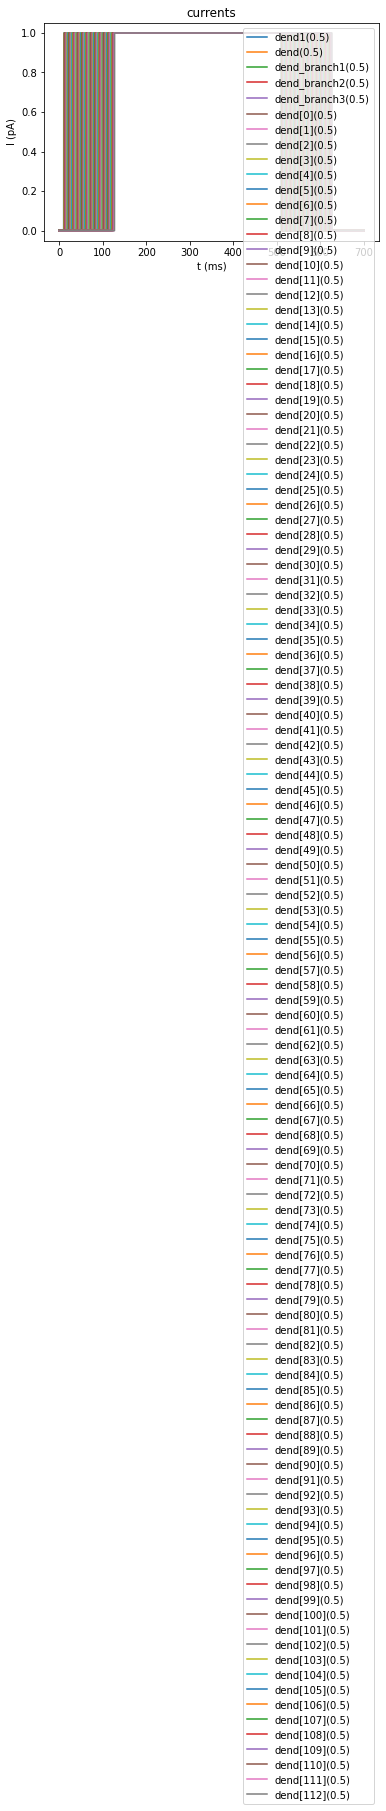

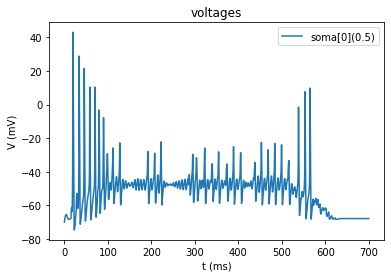

In [191]:
# What happens when you stimulate only the basal or only the apical dendrites? Why is this?

# Stimulating only the apical:
delay_time = 10
amp = 1
dur = 500

reset()

dendrite_list = Cell.dendritic

# Setup stimulations and recordings
for idx,dendrites in enumerate(dendrite_list):
    iclamp(dendrites(0.5), amplitude = amp, delay = delay_time + idx, duration = dur)
vrecord(Cell.somatic[0](0.5))

# Simulate and plot
v_init = -70
t_stop = 700
tvi_plots(initrun(v_init,t_stop),vdictlst,idictlst,vmax = -65)

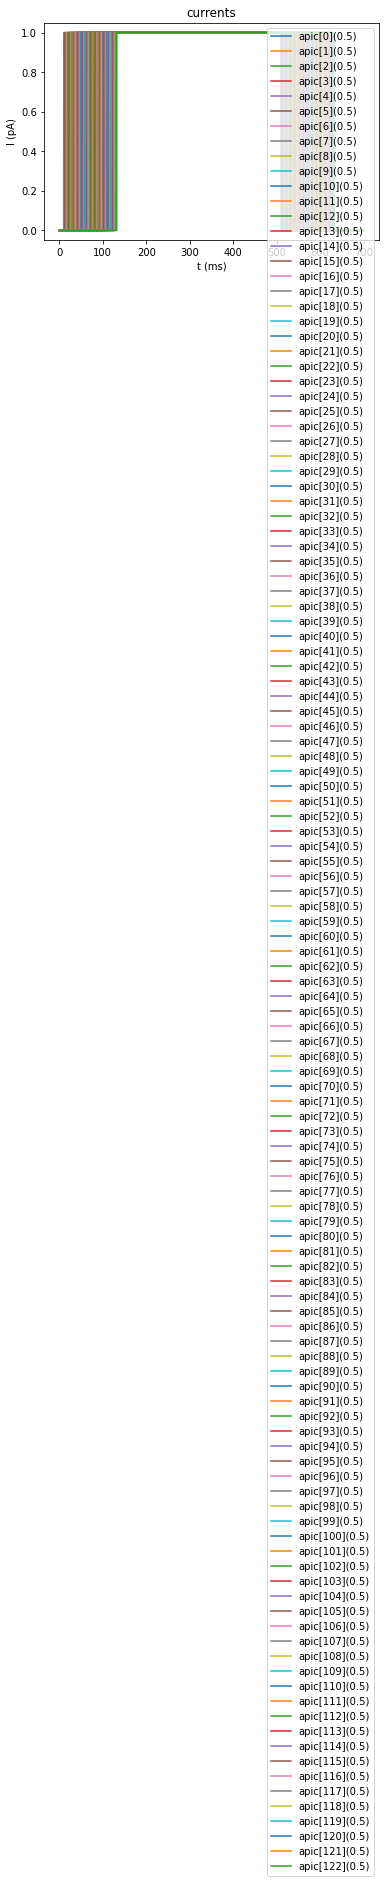

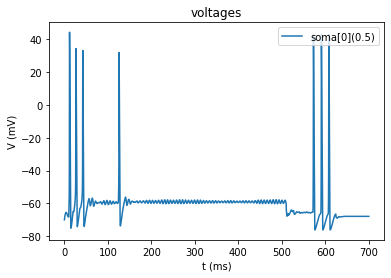

In [192]:
# Stimulating only the apical:
delay_time = 10
amp = 1
dur = 500

reset()

dendrite_list = Cell.apical

# Setup stimulations and recordings
for idx,dendrites in enumerate(dendrite_list):
    iclamp(dendrites(0.5), amplitude = amp, delay = delay_time + idx, duration = dur)
vrecord(Cell.somatic[0](0.5))

# Simulate and plot
v_init = -70
t_stop = 700
tvi_plots(initrun(v_init,t_stop),vdictlst,idictlst,vmax = -65)

# Ex 4. Signal attenuation: dendrites vs axon

<font size="3">Load the morphology file for your group, and instanciate it as it is done on tutorial 03. Perform a current clamp experiment in which the soma is stimulated in the middle (find the stimulation parameters that support your explanation better). Record the back propagating signals of the dendrites and the forward signal in the axon.

<font size="3">What would you expect in terms of attenuation? Would you expect the signal to be more attenuated in the axon or in the dendrites? Why? Change the properties of some of the sections, such that you get a different result. Explain why this works
    
[1.75 points]

In [194]:
# Load morphology file for Group 1:

# Note: the Neuron class was imported in the previous exercise, if the kernel was restarted then just that cell needs to be re-ran
Cell = NEURON()


19847 lines read


In [ ]:
# Perform a current clamp experiment in which the soma is stimulated in the middle
# (find the stimulation parameters that support your explanation better)

reset()

# Parameters to play with:
delay_time = 100
amp = 0.5
dur = 500

# Place a stimulation electrode in the middle of the soma
iclamp(Cell.somatic[0](0.5), amplitude = amp, delay = delay_time, duration = dur)

# Recording backpropagation signals of the dendrites
dendrites = Cell.apical

for idx,dendrites in enumerate(dendrite_list):
    vrecord(dendrites(0.5))

# Simulate and plot
v_init = -70
t_stop = 700
tvi_plots(initrun(v_init,t_stop),vdictlst,idictlst,vmax = -65)

In [ ]:
# Measuring forward propagation
reset()

# Parameters to play with:
delay_time = 100
amp = 0.5
dur = 500

# Place a stimulation electrode in the middle of the soma
iclamp(Cell.somatic[0](0.5), amplitude = amp, delay = delay_time, duration = dur)

# Recording forward signals of the dendrites
vrecord(axon(0)) # Once more, see if beginning of axon is axon(0) or axon(1)

# Simulate and plot
v_init = -70
t_stop = 700
tvi_plots(initrun(v_init,t_stop),vdictlst,idictlst,vmax = -65)

#### What would you expect in terms of attenuation? Would you expect the signal to be more attenuated in the axon or in the dendrites? Why? Change the properties of some of the sections, such that you get a different result. Explain why this works

Add smart answer